In [270]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

raw_data=pd.read_csv("feat9.csv",usecols=["no of pubs 10-15", "no of pubs 5-10", "mutual_weight", "NO_OF_PUB","Author_influence", "Coauthor_citation",'Final_target'])

print (raw_data.head(3))
print(raw_data.tail(3))

   no of pubs 10-15  no of pubs 5-10  mutual_weight  NO_OF_PUB  \
0          0.066667              0.0         0.0025        0.0   
1          0.066667              0.0         0.0025        0.0   
2          0.066667              0.0         0.0025        0.0   

   Author_influence  Coauthor_citation  Final_target  
0            0.0025            0.00031           0.0  
1            0.0025            0.00031           0.0  
2            0.0025            0.00031           0.0  
       no of pubs 10-15  no of pubs 5-10  mutual_weight  NO_OF_PUB  \
33095               0.0              0.0         0.0025        0.0   
33096               0.0              0.0         0.0025        0.0   
33097               0.0              0.0         0.0025        0.0   

       Author_influence  Coauthor_citation  Final_target  
33095            0.0025           0.002015           0.0  
33096            0.0025           0.002015           0.0  
33097            0.0025           0.002015           0.0 

In [254]:
raw_data.head()

,no of pubs 10-15,no of pubs 5-10,mutual_weight,NO_OF_PUB,Author_influence,Coauthor_citation,FIN_TARGET
0,0.066667,0.0,0.0025,0.0,0.0025,0.000310,0
1,0.066667,0.0,0.0025,0.0,0.0025,0.000310,0
2,0.066667,0.0,0.0025,0.0,0.0025,0.000310,0
3,0.066667,0.0,0.0025,0.0,0.0025,0.002635,0
4,0.066667,0.0,0.0025,0.0,0.0025,0.000775,0


In [255]:
print(xx.corr())

                   no of pubs 10-15  no of pubs 5-10  mutual_weight  \
no of pubs 10-15           1.000000        -0.210752       0.108576   
no of pubs 5-10           -0.210752         1.000000      -0.024949   
mutual_weight              0.108576        -0.024949       1.000000   
NO_OF_PUB                  0.260277         0.267970       0.019971   
Author_influence           0.054313        -0.032585       0.969355   
Coauthor_citation          0.055847        -0.017460       0.183205   

                   NO_OF_PUB  Author_influence  Coauthor_citation  
no of pubs 10-15    0.260277          0.054313           0.055847  
no of pubs 5-10     0.267970         -0.032585          -0.017460  
mutual_weight       0.019971          0.969355           0.183205  
NO_OF_PUB           1.000000         -0.048999          -0.022747  
Author_influence   -0.048999          1.000000           0.164947  
Coauthor_citation  -0.022747          0.164947           1.000000  


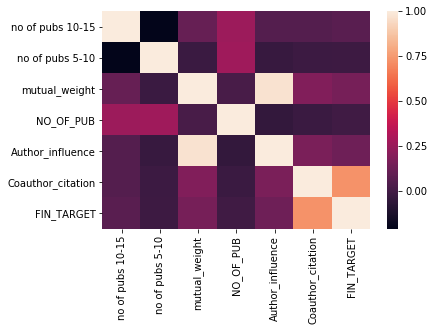

In [256]:
import seaborn as sns
corr = raw_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [271]:
X = raw_data.values[:,0:6]
Y = raw_data.values[:,6]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

In [272]:
clf = svm.SVC(C=1)

In [273]:
#train_class_array=np.round(test_class_array,decimals=6)
#test_data_array=np.round(test_data_array,decimals=6)
#test_data_array=np.nan_to_num(test_data_array)
#test_class_array=np.nan_to_num(test_class_array)
    

In [274]:

clf.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [275]:
len(X_train)

26478

##### clf.fit(X_train, y_train)

SVM Evaluation Metrics

In [277]:
pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

score = metrics.precision_score(y_test, pred,average='weighted')
print("Precision:   %0.3f" % score)

score = metrics.recall_score(y_test, pred,average='weighted')
print("Recall:   %0.3f" % score)

score = metrics.f1_score(y_test, pred,average='weighted')
print("F-measure:   %0.3f" % score)

accuracy:   0.897
Precision:   0.804
Recall:   0.897
F-measure:   0.848


C:\Users\vamsi.DESKTOP-L1SPHQG\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vamsi.DESKTOP-L1SPHQG\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [250]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5).fit(X_train)
pca_5d = pca.transform(X_train)

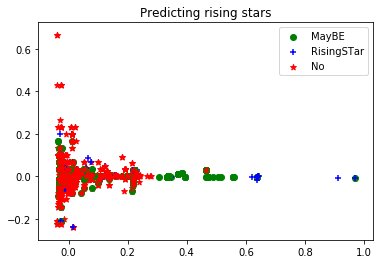

In [173]:
import pylab as pl
from sklearn.decomposition import PCA
pca = PCA(n_components=5).fit(X_train)
pca_5d = pca.transform(X_train)
for i in range(0, (pca_5d.shape[0]-1)):
    if y_train[i] == 1:
        c1=pl.scatter(pca_5d[i,0],pca_5d[i,3],c='g',marker='o')
    elif y_train[i] ==2:
        
        c2=pl.scatter(pca_5d[i,0],pca_5d[i,3],c='b',marker='+')
    elif y_train[i] ==0:
        
        c3=pl.scatter(pca_5d[i,0],pca_5d[i,3],c='r',marker='*')    
        
pl.legend([c1, c2, c3], ['MayBE', 'RisingSTar','No'])
pl.title('Predicting rising stars')
pl.show()        
        
   